# 성별 교통사고 현황

1. 데이터명 : 성별 연령층별 교통사고 (이 중에서 성별 자료만 사용, 연령층별은 따로 만듦)
2. 목적 : 단순히 pm 사고가 어느 성별에서 더 많이 나타나는지를 보이기 위함 (혜현이ppt 슬라이드 3장에 나와있는 성별 자료 형식이 제일 좋아보임)

In [2]:
# rawData
import pandas as pd
df2 = pd.read_excel('C:\\rawData\\성별 연령층별 교통사고.xls')
df2_1 = df2.drop(columns=['가해운전자 차량종별 대분류','가해운전자 차량종별','기준년도']).iloc[59:62,].rename(index={59:'사고건수', 60:'사망자수',61:'부상자수'}).replace('-',0)
df2_1

,2017년,2017년.1,2017년.2,2017년.3,2017년.4,2017년.5,2017년.6,2017년.7,2017년.8,2017년.9,...,2021년.22,2021년.23,2021년.24,2021년.25,2021년.26,2021년.27,2021년.28,2021년.29,2021년.30,2021년.31
사고건수,117,90,25,2,0,16,16,0,0,28,...,17,2,62,50,12,26,2,0,24,0
사망자수,4,3,1,0,0,0,0,0,0,1,...,2,1,1,1,0,0,0,0,0,0
부상자수,124,95,27,2,0,16,16,0,0,32,...,15,1,66,54,12,26,2,0,24,0


In [3]:
# pm만 추출
a = df2_1.iloc[:,0:5]
b = df2_1.iloc[:,37:42]
c = df2_1.iloc[:,68:73]
d = df2_1.iloc[:,101:106]
e = df2_1.iloc[:,132:137]
df2_pm = pd.concat([a,b,c,d,e],axis=1)
df2_pm.columns = [
'2017.sum','2017_m','2017_f','2017_etc','2017_unknown',
'2018.sum','2018_m','2018_f','2018_etc','2018_unknown',
'2019.sum','2019_m','2019_f','2019_etc','2019_unknown',
'2020.sum','2020_m','2020_f','2020_etc','2020_unknown',
'2021.sum','2021_m','2021_f','2021_etc','2021_unknown']
df2_pm

,2017.sum,2017_m,2017_f,2017_etc,2017_unknown,2018.sum,2018_m,2018_f,2018_etc,2018_unknown,...,2020.sum,2020_m,2020_f,2020_etc,2020_unknown,2021.sum,2021_m,2021_f,2021_etc,2021_unknown
사고건수,117,90,25,2,0,225,183,41,1,0,...,897,662,229,6,0,1735,1254,457,24,0
사망자수,4,3,1,0,0,4,4,0,0,0,...,10,10,0,0,0,19,16,3,0,0
부상자수,124,95,27,2,0,238,196,41,1,0,...,985,719,260,6,0,1901,1369,508,24,0


In [4]:
# male
df2_pm_m = df2_pm[['2017_m','2018_m','2019_m','2020_m','2021_m']]
df2_pm_m

,2017_m,2018_m,2019_m,2020_m,2021_m
사고건수,90,183,356,662,1254
사망자수,3,4,8,10,16
부상자수,95,196,374,719,1369


In [5]:
# female
df2_pm_f = df2_pm[['2017_f','2018_f','2019_f','2020_f','2021_f']]
df2_pm_f

,2017_f,2018_f,2019_f,2020_f,2021_f
사고건수,25,41,87,229,457
사망자수,1,0,0,0,3
부상자수,27,41,95,260,508


### 시각화를 위한 추가 전처리
- 성별 사고건수 데이터만 사용

In [6]:
df2_pm_m.columns = ['2017','2018','2019','2020','2021']
df2_pm_f.columns = ['2017','2018','2019','2020','2021']

In [7]:
gender_new = pd.concat([df2_pm_m.iloc[0:1,:], df2_pm_f.iloc[0:1,:]], axis=0)
gender_final = gender_new.reset_index(drop=True).set_index(pd.Index(['Man','Woman'])).transpose()
gender_final

,Man,Woman
2017,90,25
2018,183,41
2019,356,87
2020,662,229
2021,1254,457


In [8]:
gender_new = pd.concat([df2_pm_m.iloc[0:1,:], df2_pm_f.iloc[0:1,:]], axis=0)
gender_final2 = gender_new.reset_index(drop=True).set_index(pd.Index(['Man','Woman']))
gender_final2

,2017,2018,2019,2020,2021
Man,90,183,356,662,1254
Woman,25,41,87,229,457


# 시각화

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.font_manager as fm
import itertools
import matplotlib.animation as animation

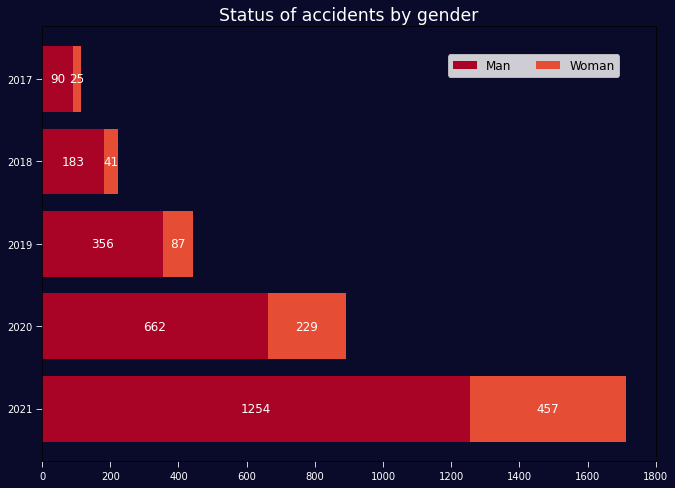

In [62]:
category_names =['Man', 'Woman']

results = {
    '2017' : list(gender_final2.iloc[:,0]),
    '2018' : list(gender_final2.iloc[:,1]),
    '2019' : list(gender_final2.iloc[:,2]),
    '2020' : list(gender_final2.iloc[:,3]),
    '2021' : list(gender_final2.iloc[:,4])
}

def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.01, 0.15, data.shape[1]))
    
    fig, ax = plt.subplots(figsize = (11,8))
    fig.patch.set_facecolor('#0A0A2A')
    ax.invert_yaxis()
    ax.set_xlim(0, 1800)
    ax.set_title("Status of accidents by gender", color="white", fontsize='xx-large')
    ax.tick_params(axis='x', colors='white', grid_color='white',length=6)
    ax.tick_params(axis='y', colors='white', grid_color='white',length=6)

    for i, (colname,color) in enumerate(zip(category_names, category_colors)):
        widths = data[:,i]
        starts = data_cum[:,i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label = colname, color = color)
        r, g, b, _ = color
        text_color = 'white'
        ax.bar_label(rects, label_type='center',color=text_color, fontsize='large')
    
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.95,0.95),
              loc='upper right', fontsize='large')
    ax.set_facecolor('#0A0A2A')

    return fig, ax

survey(results, category_names)
plt.show()

In [64]:
# 이건 아님
''' fig, ax = plt.subplots(1, 1, figsize = (12, 8))
fig.patch.set_facecolor('#0B0B3B')

ax.barh(gender_final.index, gender_final["Man"], color='#FFFF00', label="car")
ax.barh(gender_final.index, gender_final["Woman"], left=gender_final["Man"], color="#FF0000", label="other")

ax.set_title("성별 사고 현황", color="white")
ax.set_xlim(0, 1800)
ax.invert_yaxis()
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.legend(["교통사고", "기타"], labelcolor="white", edgecolor="white", facecolor="None", loc=1)
ax.set_facecolor('#0B0B3B') '''

' fig, ax = plt.subplots(1, 1, figsize = (12, 8))\nfig.patch.set_facecolor(\'#0B0B3B\')\n\nax.barh(gender_final.index, gender_final["Man"], color=\'#FFFF00\', label="car")\nax.barh(gender_final.index, gender_final["Woman"], left=gender_final["Man"], color="#FF0000", label="other")\n\nax.set_title("성별 사고 현황", color="white")\nax.set_xlim(0, 1800)\nax.invert_yaxis()\nax.set_yticks([])\nax.spines["top"].set_visible(False)\nax.spines["bottom"].set_visible(False)\nax.spines["right"].set_visible(False)\nax.spines["left"].set_visible(False)\nax.tick_params(axis=\'x\', colors=\'white\')\nax.tick_params(axis=\'y\', colors=\'white\')\nax.legend(["교통사고", "기타"], labelcolor="white", edgecolor="white", facecolor="None", loc=1)\nax.set_facecolor(\'#0B0B3B\') '